In [1]:
# Cell 1: Load and Inspect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic_1M.csv')

# Inspect the data
print("--- First 5 Rows ---")
print(df.head())
print("\n--- Data Info ---")
df.info()
print("\n--- Statistical Summary ---")
print(df.describe())

--- First 5 Rows ---
   PassengerId  Survived  Pclass                         Name     Sex   Age  \
0         1310         1       1  Name1310, Miss. Surname1310  female   NaN   
1         1311         0       3   Name1311, Col. Surname1311    male  29.0   
2         1312         0       3    Name1312, Mr. Surname1312    male  20.0   
3         1313         0       3    Name1313, Mr. Surname1313    male  27.0   
4         1314         0       3    Name1314, Mr. Surname1314    male  32.0   

   SibSp  Parch            Ticket       Fare Cabin Embarked  
0      0      0  SOTON/O2 3101272  76.760165   NaN        C  
1      0      0            223596  10.193097   NaN        S  
2      0      0             54636  12.029416   C83        C  
3      0      0          PC 17760  13.429448   NaN        S  
4      0      0            364512   4.840769   E33        C  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 

In [2]:
# Cell 2: Clean Data
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

df.drop('Cabin', axis=1, inplace=True)
df.drop_duplicates(inplace=True)

print("Data successfully cleaned. Remaining null values:")
print(df.isnull().sum())

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_38645/3169451372.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_38645/3169451372.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

Data successfully cleaned. Remaining null values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


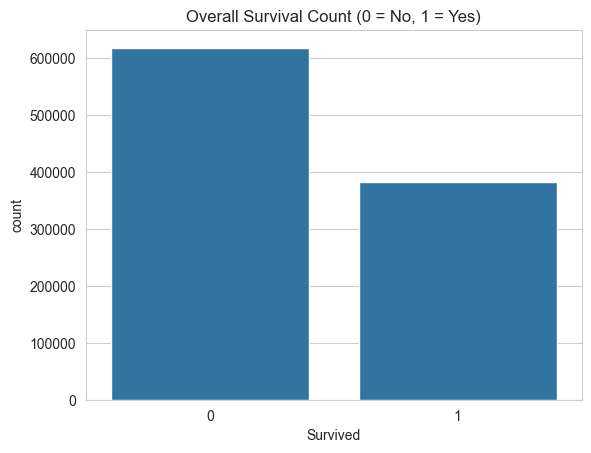

In [3]:
# Cell 3: Plot overall survival
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Count (0 = No, 1 = Yes)');

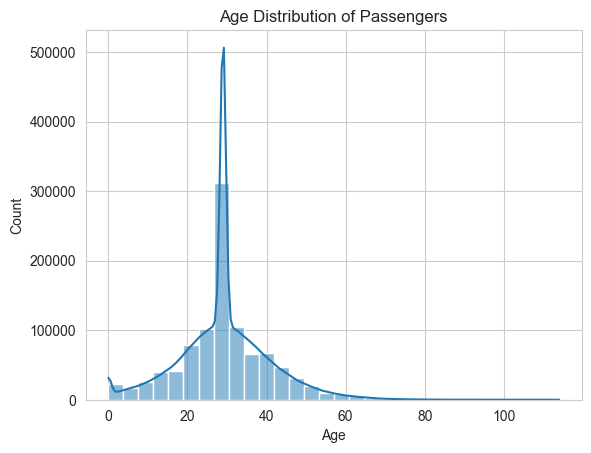

In [4]:
# Cell 4: Plot age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age');

In [5]:
# Final Cell: Build and Evaluate Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data for the model
df_model = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

# Ensure all feature columns exist after creating dummies
X = df_model[[col for col in features if col in df_model.columns]]
y = df_model[target]

# Split data and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 80.23%
